# ``Encoding``

In [71]:
# Lectura de datos
# ==============================================================================
import pickle

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable
from sklearn.preprocessing import OneHotEncoder

# Estadísticos
# ==============================================================================
from scipy import stats
import researchpy as rp
from scipy.stats import levene
from sklearn.preprocessing import RobustScaler


# Librerías para manejar fechas
# ==============================================================================
from datetime import datetime
import calendar

# Desplegar todas las columnas
# ==============================================================================
pd.options.display.max_columns = None

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Test de Shapiro
# ==============================================================================
from scipy import stats

# Asimetría
# ==============================================================================
from scipy.stats import skew

# Curtosis
# ==============================================================================
from scipy.stats import kurtosistest

# Test de Levene
# ==============================================================================
from scipy.stats import levene

# Configuración warnings
# ==============================================================================
#import warnings
#warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [72]:
#df = pd.read_pickle('datos/2.bikes_corr.pkl')
#df = pd.read_csv('datos/1.bikes_limpio.csv', index_col=0).reset_index(drop=True)
#df.head()

In [73]:
#df = pd.read_pickle('datos/1.bikes_corr.pkl')
df = pd.read_csv('datos/1.bikes_limpio.csv', index_col=0).reset_index(drop=True)
df.head()

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-01-03,winter,0,1,0,2,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-01-04,winter,0,1,0,3,thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-01-05,winter,0,1,0,4,friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [74]:
df.dtypes

dteday             object
seasons            object
yr                  int64
mnth                int64
holiday_num         int64
weekday_num         int64
weekday_cat        object
workingday_num      int64
weathersit          int64
temp              float64
atemp             float64
hum               float64
windspeed         float64
casual              int64
registered          int64
cnt                 int64
dtype: object

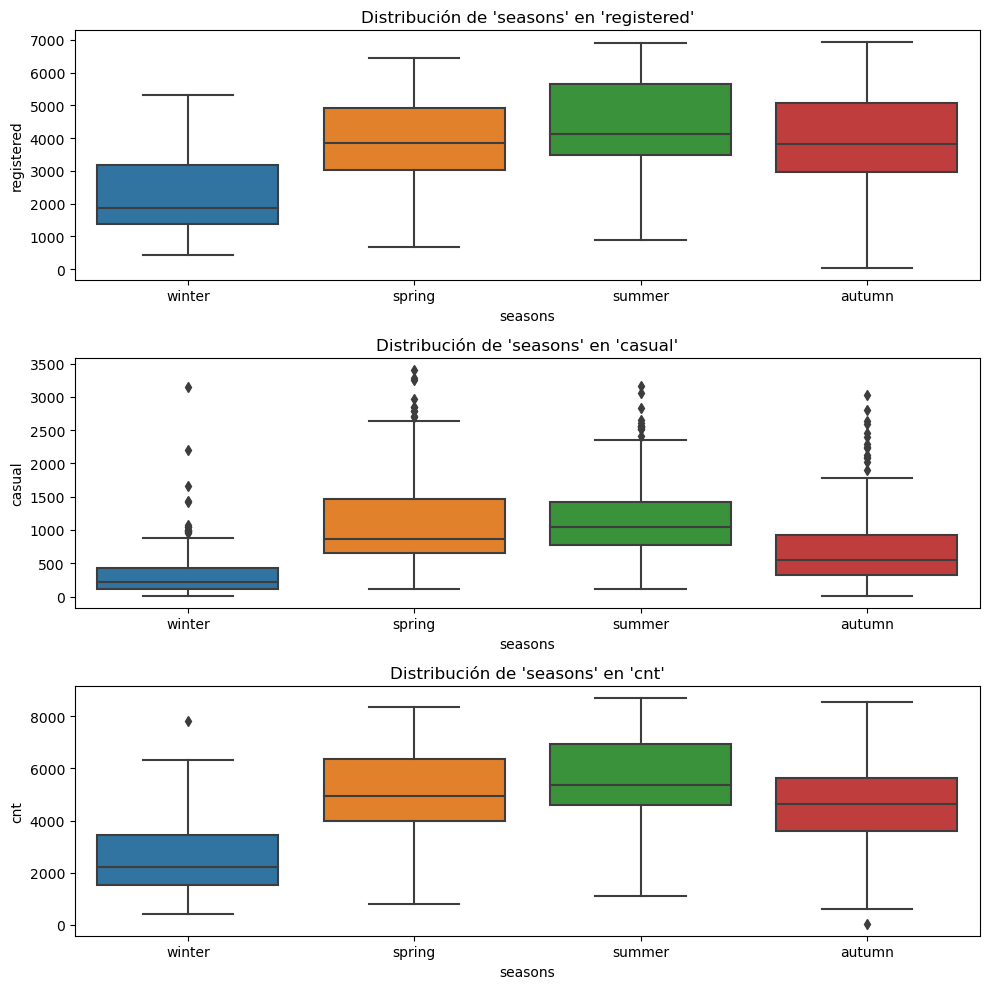

In [75]:
# Representación gráfica
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.boxplot(x="seasons", y="registered", data=df, ax=axes[0])
sns.boxplot(x="seasons", y="casual", data=df, ax=axes[1])
sns.boxplot(x="seasons", y="cnt", data=df, ax=axes[2])

axes[0].set_title("Distribución de 'seasons' en 'registered'")
axes[1].set_title("Distribución de 'seasons' en 'casual'")
axes[2].set_title("Distribución de 'seasons' en 'cnt'")

fig.tight_layout()

plt.show()

In [76]:
round(df.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
yr,730.0,0.50,0.50,0.00,0.00,0.50,1.00,1.00
mnth,730.0,6.53,3.45,1.00,4.00,7.00,10.00,12.00
holiday_num,730.0,0.04,0.20,0.00,0.00,0.00,0.00,1.00
weekday_num,730.0,2.99,2.00,0.00,1.00,3.00,5.00,6.00
workingday_num,730.0,0.68,0.47,0.00,0.00,1.00,1.00,1.00
weathersit,730.0,1.39,0.54,1.00,1.00,1.00,2.00,3.00
temp,730.0,20.32,7.51,2.42,13.81,20.47,26.88,35.33
atemp,730.0,23.73,8.15,3.95,16.89,24.37,30.45,42.04
hum,730.0,62.91,13.95,25.42,52.22,62.65,72.99,97.25
windspeed,730.0,12.48,4.77,1.50,9.04,12.13,15.41,25.33


In [77]:
def categorizar_cuentas(col):
    if col <= 3170:
        return "bajo"
    #colocamos como el otro extremo del rango el 4549 ya que de lo contrario se pierde un caso
    elif col in range(3171,4549):
        return "medio"
    elif col >= 4549:
        return "alto"
    else:
        pass

In [78]:
casos = ['registered', 'casual', 'cnt']
for x in casos:
    nueva_col = x + '_cat'
    df[nueva_col] = df[x].apply(categorizar_cuentas)
    print(f'Para la columna {nueva_col} los valores son: \n{df[nueva_col].value_counts()}')

Para la columna registered_cat los valores son: 
bajo     265
medio    258
alto     207
Name: registered_cat, dtype: int64
Para la columna casual_cat los valores son: 
bajo     727
medio      3
Name: casual_cat, dtype: int64
Para la columna cnt_cat los valores son: 
alto     365
bajo     183
medio    182
Name: cnt_cat, dtype: int64


In [79]:
df.head()

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_cat,casual_cat,cnt_cat
0,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,bajo,bajo,bajo
1,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,bajo,bajo,bajo
2,2018-01-03,winter,0,1,0,2,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,bajo,bajo,bajo
3,2018-01-04,winter,0,1,0,3,thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,bajo,bajo,bajo
4,2018-01-05,winter,0,1,0,4,friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,bajo,bajo,bajo


In [80]:
pd.crosstab(df["cnt_cat"], df["seasons"], margins=True)

seasons,autumn,spring,summer,winter,All
cnt_cat,,,,,
alto,93,113,143,16,365
bajo,29,28,4,122,183
medio,56,43,41,42,182
All,178,184,188,180,730


En orden de frecuencias, encontramos:
1. verano (188)
2. primavera (184)
3. invierno (180)
4. otoño (178)

In [81]:
#aplicamos el método de get dummies para separar los valores de seasons por columnas:

''' dummies = pd.get_dummies(df["seasons"], prefix_sep = "_", prefix = "seasons", dtype = int)
df_dummies = pd.concat([df, dummies], axis = 1)
df_dummies.head() '''

' dummies = pd.get_dummies(df["seasons"], prefix_sep = "_", prefix = "seasons", dtype = int)\ndf_dummies = pd.concat([df, dummies], axis = 1)\ndf_dummies.head() '

Vamos a hacer el encoding con OneHotEncoder ya que no le vamos a dar orden a estación:

In [82]:
# iniciamos el método de OneHot Encoder
oh = OneHotEncoder()
transformados = oh.fit_transform(df[['seasons']])
oh_df = pd.DataFrame(transformados.toarray())
#en los apuntes aparece 'get_feature_names', pero no ha funcionado. ha funcionado esto:
oh_df.columns = oh.get_feature_names_out()
oh_df.head()

,seasons_autumn,seasons_spring,seasons_summer,seasons_winter
0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0


In [83]:
df_oh = pd.concat([df, oh_df], axis=1)
df_oh.head()

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,registered_cat,casual_cat,cnt_cat,seasons_autumn,seasons_spring,seasons_summer,seasons_winter
0,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,bajo,bajo,bajo,0.0,0.0,0.0,1.0
1,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,bajo,bajo,bajo,0.0,0.0,0.0,1.0
2,2018-01-03,winter,0,1,0,2,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,bajo,bajo,bajo,0.0,0.0,0.0,1.0
3,2018-01-04,winter,0,1,0,3,thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,bajo,bajo,bajo,0.0,0.0,0.0,1.0
4,2018-01-05,winter,0,1,0,4,friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,bajo,bajo,bajo,0.0,0.0,0.0,1.0


In [84]:
df_oh.shape

(730, 23)

In [85]:
df_oh.drop(['seasons'], axis=1, inplace=True)

Hemos recodificado la variable seasons con el  método de OneHotEncoder y borrado la original.

In [86]:
df_oh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dteday          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    int64  
 3   holiday_num     730 non-null    int64  
 4   weekday_num     730 non-null    int64  
 5   weekday_cat     730 non-null    object 
 6   workingday_num  730 non-null    int64  
 7   weathersit      730 non-null    int64  
 8   temp            730 non-null    float64
 9   atemp           730 non-null    float64
 10  hum             730 non-null    float64
 11  windspeed       730 non-null    float64
 12  casual          730 non-null    int64  
 13  registered      730 non-null    int64  
 14  cnt             730 non-null    int64  
 15  registered_cat  730 non-null    object 
 16  casual_cat      730 non-null    object 
 17  cnt_cat         730 non-null    obj

In [87]:
df_oh.dtypes

dteday             object
yr                  int64
mnth                int64
holiday_num         int64
weekday_num         int64
weekday_cat        object
workingday_num      int64
weathersit          int64
temp              float64
atemp             float64
hum               float64
windspeed         float64
casual              int64
registered          int64
cnt                 int64
registered_cat     object
casual_cat         object
cnt_cat            object
seasons_autumn    float64
seasons_spring    float64
seasons_summer    float64
seasons_winter    float64
dtype: object

In [88]:
lista_columnas =[ 'yr', 'mnth', 'holiday_num', 'weekday_num',
                     'workingday_num', 'weathersit',
                     'registered_cat', 'casual_cat', 'cnt_cat']

In [89]:
for col in lista_columnas:
    df_oh[col] = df_oh[col].astype('category')

In [90]:
df_oh.dtypes

dteday              object
yr                category
mnth              category
holiday_num       category
weekday_num       category
weekday_cat         object
workingday_num    category
weathersit        category
temp               float64
atemp              float64
hum                float64
windspeed          float64
casual               int64
registered           int64
cnt                  int64
registered_cat    category
casual_cat        category
cnt_cat           category
seasons_autumn     float64
seasons_spring     float64
seasons_summer     float64
seasons_winter     float64
dtype: object

In [91]:
# df_oh.to_csv('datos/4.encoding_oh.csv')

In [92]:
df_oh2 = df_oh.copy()

df_oh2.drop(['registered_cat',
       'casual_cat', 'cnt_cat'], axis=1, inplace=True)

df_oh2.head()

,dteday,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons_autumn,seasons_spring,seasons_summer,seasons_winter
0,2018-01-01,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0.0,0.0,0.0,1.0
1,2018-01-02,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0.0,0.0,0.0,1.0
2,2018-01-03,0,1,0,2,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0.0,0.0,0.0,1.0
3,2018-01-04,0,1,0,3,thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0.0,0.0,0.0,1.0
4,2018-01-05,0,1,0,4,friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0.0,0.0,0.0,1.0


In [93]:
# función para convertir los días del mes en dias del año
def convertir_dia_anual (registro):
    dia = pd.Period(registro, freq='H')
    return dia.day_of_year

In [94]:
df_oh2["dia_anual"] = df_oh2["dteday"].apply(convertir_dia_anual)
df_oh2.tail(3)

,dteday,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons_autumn,seasons_spring,seasons_summer,seasons_winter,dia_anual
727,2019-12-29,1,12,0,6,sunday,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0.0,0.0,0.0,1.0,363
728,2019-12-30,1,12,0,0,monday,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0.0,0.0,0.0,1.0,364
729,2019-12-31,1,12,1,1,tuesday,0,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729,0.0,0.0,0.0,1.0,365


In [95]:
df_oh2.columns

Index(['dteday', 'yr', 'mnth', 'holiday_num', 'weekday_num', 'weekday_cat',
       'workingday_num', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'seasons_autumn', 'seasons_spring',
       'seasons_summer', 'seasons_winter', 'dia_anual'],
      dtype='object')

In [96]:
nuevo_orden = ['dteday', 'yr', 'mnth', 'dia_anual', 'holiday_num', 'weekday_num', 'workingday_num',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'seasons_autumn',
       'seasons_spring', 'seasons_summer', 'seasons_winter']

In [97]:
df_oh2 = df_oh2.reindex(columns= nuevo_orden)

In [98]:
df_oh2.drop(["dteday"], axis=1, inplace=True)

In [99]:
df_oh2.head(2)

,yr,mnth,dia_anual,holiday_num,weekday_num,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,seasons_autumn,seasons_spring,seasons_summer,seasons_winter
0,0,1,1,1,0,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0.0,0.0,0.0,1.0
1,0,1,2,0,1,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,0.0,0.0,0.0,1.0


In [100]:
#period = pd.Period("2023-12-31", freq='H')
#period.day_of_year

In [101]:
df_oh2.isnull().sum()

yr                0
mnth              0
dia_anual         0
holiday_num       0
weekday_num       0
workingday_num    0
weathersit        0
temp              0
atemp             0
hum               0
windspeed         0
casual            0
registered        0
cnt               0
seasons_autumn    0
seasons_spring    0
seasons_summer    0
seasons_winter    0
dtype: int64

In [102]:
df_oh2.columns

Index(['yr', 'mnth', 'dia_anual', 'holiday_num', 'weekday_num',
       'workingday_num', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'seasons_autumn', 'seasons_spring',
       'seasons_summer', 'seasons_winter'],
      dtype='object')

In [103]:
lista_columnas_2 =['dia_anual','seasons_autumn', 'seasons_spring', 'seasons_summer', 'seasons_winter']

In [104]:
for col in lista_columnas_2:
    df_oh2[col] = df_oh2[col].astype('category')

In [105]:
df_oh2.dtypes

yr                category
mnth              category
dia_anual         category
holiday_num       category
weekday_num       category
workingday_num    category
weathersit        category
temp               float64
atemp              float64
hum                float64
windspeed          float64
casual               int64
registered           int64
cnt                  int64
seasons_autumn    category
seasons_spring    category
seasons_summer    category
seasons_winter    category
dtype: object

In [106]:
# Creamos los df con lo que se trabajará registrados
df_registered = df_oh2.drop(['casual', 'cnt'], axis=1)

In [107]:
# Creamos los df con lo que se trabajará casuales
df_casual = df_oh2.drop(['registered','cnt'], axis=1)

In [108]:
#guardamos en csv y en pkl los df con todos los datos:

df_oh2.to_csv('datos/4.encoding_oh_final.csv')
df_oh2.to_pickle('datos/4.encoding_oh_final.pkl')

In [109]:
#guardamos en csv y en pkl los df con los datos de registrados:

df_registered.to_csv('datos/4.reg_encoding_oh_final.csv')
df_registered.to_pickle('datos/4.reg_encoding_oh_final.pkl')

In [110]:
#guardamos en csv y en pkl los df con los datos de casuales:

df_casual.to_csv('datos/4.casual_encoding_oh_final.csv')
df_casual.to_pickle('datos/4.casual_encoding_oh_final.pkl')